In [44]:
import numpy as np
import pandas as pd

In [45]:
#in this project, I will load the mushroom dataset from Kaggle and use machine learning to try and classify 
#the mushrooms into 2 classes:  edible=e, poisonous=p

In [46]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [47]:
#lets inspect the data
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [48]:
df.apply(pd.unique)

class                                                     [p, e]
cap-shape                                     [x, b, s, f, k, c]
cap-surface                                         [s, y, f, g]
cap-color                         [n, y, w, g, e, p, b, u, c, r]
bruises                                                   [t, f]
odor                                 [p, a, l, n, f, c, y, s, m]
gill-attachment                                           [f, a]
gill-spacing                                              [c, w]
gill-size                                                 [n, b]
gill-color                  [k, n, g, p, w, h, u, e, b, r, y, o]
stalk-shape                                               [e, t]
stalk-root                                       [e, c, b, r, ?]
stalk-surface-above-ring                            [s, f, k, y]
stalk-surface-below-ring                            [s, f, y, k]
stalk-color-above-ring               [w, g, p, n, b, e, o, c, y]
stalk-color-below-ring   

In [49]:
#first we see that out data is not numerical, so we need to do some preprocessing
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for column in df.columns:
    df[column] = enc.fit_transform(df[column])
df.apply(pd.unique)

class                                                       [1, 0]
cap-shape                                       [5, 0, 4, 2, 3, 1]
cap-surface                                           [2, 3, 0, 1]
cap-color                           [4, 9, 8, 3, 2, 5, 0, 7, 1, 6]
bruises                                                     [1, 0]
odor                                   [6, 0, 3, 5, 2, 1, 8, 7, 4]
gill-attachment                                             [1, 0]
gill-spacing                                                [0, 1]
gill-size                                                   [1, 0]
gill-color                  [4, 5, 2, 7, 10, 3, 9, 1, 0, 8, 11, 6]
stalk-shape                                                 [0, 1]
stalk-root                                         [3, 2, 1, 4, 0]
stalk-surface-above-ring                              [2, 0, 1, 3]
stalk-surface-below-ring                              [2, 0, 3, 1]
stalk-color-above-ring                 [7, 3, 6, 4, 0, 2, 5, 1

<AxesSubplot:>

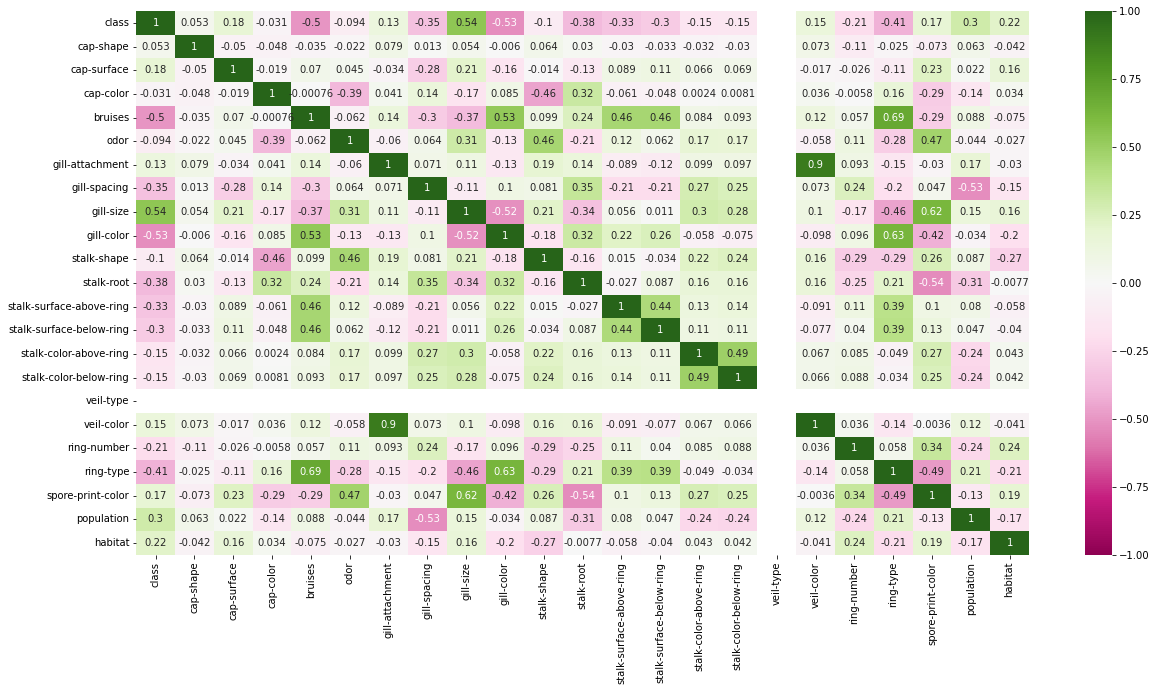

In [50]:
#the dataset has a lot of features, now lets analyze are all those features really meaningfull for model training
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), vmin=-1, vmax=1 , cmap="PiYG", annot=True)

In [51]:
#lets inspect just the target column (class)
df.corr()['class']

class                       1.000000
cap-shape                   0.052951
cap-surface                 0.178446
cap-color                  -0.031384
bruises                    -0.501530
odor                       -0.093552
gill-attachment             0.129200
gill-spacing               -0.348387
gill-size                   0.540024
gill-color                 -0.530566
stalk-shape                -0.102019
stalk-root                 -0.379361
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
veil-type                        NaN
veil-color                  0.145142
ring-number                -0.214366
ring-type                  -0.411771
spore-print-color           0.171961
population                  0.298686
habitat                     0.217179
Name: class, dtype: float64

In [52]:
df=df.drop(columns=['cap-shape','cap-color','veil-type'])

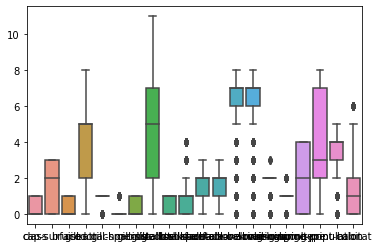

In [53]:
#check for the outliers
sns.boxplot(data=df);
#we can see many outliers in dataset. those outliers can affect the model training in the bad way

In [54]:
#for outliers cleanin, we will use the statistical definition of the outlier
def clean_outliers(df, column_name):
    x=df[column_name]
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    outliers=(x<lower_bound)|(x>upper_bound)
    df_cleaned = df[~outliers]
    return df_cleaned

In [55]:
for column in df.columns:
    df=clean_outliers(df,column)

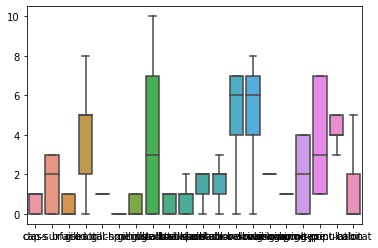

In [56]:
sns.boxplot(data=df);

In [57]:
#now lets separate our data to output target and input features
y = df['class']
X = df.drop(columns='class')

In [58]:
#splitting the data to train/test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [59]:
#now lets see which model should be the best for out problem
#i will separate grid searches because of high number of iterations
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

model1 = {
    'RandomForest': 
        {'model' : RandomForestClassifier(), 
        'params' : {'n_estimators': [30, 50, 80, 150], 'max_depth': [None, 10]}}
}
model2 = {
    'SVM': 
        {'model' : SVC(), 
        'params': {'C': [0.1, 1, 5, 10], 'kernel': ['linear', 'rbf']}}
}
model3 = {
    'KNN': 
        {'model' : KNeighborsClassifier(), 
        'params' : {'n_neighbors' : [3,5,7], 'p': [1, 2]}}
}

model4 = {
    'NaiveBayes': 
        {'model' : GaussianNB(), 
        'params' : {'priors': [None, [0.1, 0.9], [0.3, 0.7]]}}
}

In [60]:
scores = []
for model_name, mp in model1.items():
    clf=GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

In [61]:
for model_name, mp in model2.items():
    clf=GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

In [62]:
for model_name, mp in model3.items():
    clf=GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

In [63]:
for model_name, mp in model4.items():
    clf=GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

In [64]:
scores

[{'model': 'RandomForest',
  'best_score': 0.9912248628884827,
  'best_params': {'max_depth': None, 'n_estimators': 30}},
 {'model': 'SVM',
  'best_score': 0.9912248628884827,
  'best_params': {'C': 1, 'kernel': 'linear'}},
 {'model': 'KNN',
  'best_score': 0.9875779052198375,
  'best_params': {'n_neighbors': 3, 'p': 1}},
 {'model': 'NaiveBayes',
  'best_score': 0.9223485512509079,
  'best_params': {'priors': [0.1, 0.9]}}]

In [66]:
#we see that Random Forest ans Support Vector Machines give the best and identical results (99.122%!)
#For further analysis we will use RandomForestClassifiet
rfc=RandomForestClassifier(n_estimators=30, max_depth=None)
rfc.fit(X_train,y_train)
predictions=rfc.predict(X_test)

In [ ]:
#lets check the performance of our model again, but more in detail
from sklearn.metrics import accuracy_score
print('Accuracy score (from 0-1) is: ', accuracy_score(y_test, predictions), '!')

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions).ravel()
plt.figure(figsize=(10,6))
plt.pie(cm);
plt.legend(labels=['True Poisonous','False Poisonous','False Edible','True Edible'])
plt.title("Graphically respresented Confusion Matrix")

In [84]:
#lets allow a user to inputdata fror found mushroom
mushroom=[]
mushroom.append(input('Input cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s '))
mushroom.append(input('Input bruises: bruises=t,no=f'))
mushroom.append(input('Input odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s'))
mushroom.append(input('Input gill-attachment: attached=a,descending=d,free=f,notched=n'))
mushroom.append(input('Input gill-spacing: close=c,crowded=w,distant=d'))
mushroom.append(input('Input gill-size: broad=b,narrow=n'))
mushroom.append(input('Input gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y'))
mushroom.append(input('Input stalk-shape: enlarging=e,tapering=t'))
mushroom.append(input('Input stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?'))
mushroom.append(input('Input stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s'))
mushroom.append(input('Input stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s'))
mushroom.append(input('Input stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y'))
mushroom.append(input('Input stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y'))
mushroom.append(input('Input veil-color: brown=n,orange=o,white=w,yellow=y'))
mushroom.append(input('Input ring-number: none=n,one=o,two=t'))
mushroom.append(input('Input ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z'))
mushroom.append(input('Input spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y'))
mushroom.append(input('Input population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y'))
mushroom.append(input('Input habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d'))


Input cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s s
Input bruises: bruises=t,no=ff
Input odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=sl
Input gill-attachment: attached=a,descending=d,free=f,notched=na
Input gill-spacing: close=c,crowded=w,distant=dc
Input gill-size: broad=b,narrow=nn
Input gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=yn
Input stalk-shape: enlarging=e,tapering=tt
Input stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?u
Input stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=sy
Input stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=sf
Input stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=yb
Input stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=yb
Input veil-color: brown=n,orange=o,white=w,yellow=yy
Input ring-number: none=n,one=o,tw

In [92]:
mushroom=enc.fit_transform(mushroom)
mushroom=np.array(mushroom)
mushroom=mushroom.ravel()
mushroom=mushroom.reshape(1,-1)
prediction=rfc.predict(mushroom)

In [94]:
if prediction[0]==1:
    print("Be careful, the mushroom is most likely to be poisonous!")
else:
    print("Mushroom is most likely safe to eat!")

Mushroom is most likely safe to eat!
